In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

edges= [
(0,1), (0,2), (0,3), (1,4), (2,5), (3,6), (4,5), (5,6)
]
n = 7
depth = 10
shots = 10000

def exp_val(edges, string, count):
    score = max_cut_value(edges, string)
    val = (count * score)
    return val

def max_cut_value(edges, bitstring):
    """
    Spočítá počet hran, které jsou "řezané" pro daný bitstring.

    edges: seznam dvojic (i, j) reprezentujících hrany
    bitstring: řetězec '0101...' nebo seznam [0,1,0,...]

    Vrací počet řezaných hran.
    """
    # Pokud je bitstring řetězec, převedeme na seznam čísel
    if isinstance(bitstring, str):
        bits = [int(b) for b in bitstring]
    else:
        bits = bitstring
    
    cut_value = 0
    for i, j in edges:
        if bits[i] != bits[j]:
            cut_value += 1
    return cut_value


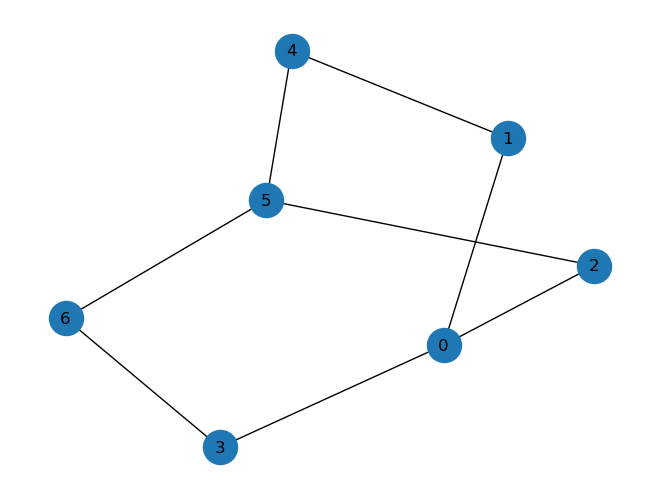

In [166]:
graph = rx.PyGraph()
graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
graph.add_edges_from([(i, j, 1) for (i, j) in edges])
draw_graph(graph, node_size=600, with_labels=True)


In [167]:
def f(params):
    gamma,beta = params
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(q, c)
    for i in range (n):
        qc.h(q[i])
    for i in range(depth):
        for (i, j) in edges:
            qc.rzz(2*gamma, q[i], q[j])
        for i in range (n):
            qc.rx(2*beta, q[i])
    for i in range (n):
        qc.measure(q[i], c[i])

    simulator = AerSimulator(shots=shots/10)
    job = simulator.run(qc)
    result = job.result()
    counts = result.get_counts()
    exval = 0
    for j in (counts):
        count = counts[j]
        bitstring = j
        exval += exp_val(edges, bitstring, count)
    exval = exval / 10000
    return -exval

result = minimize(f, [0.5, 0.5], method='COBYLA')

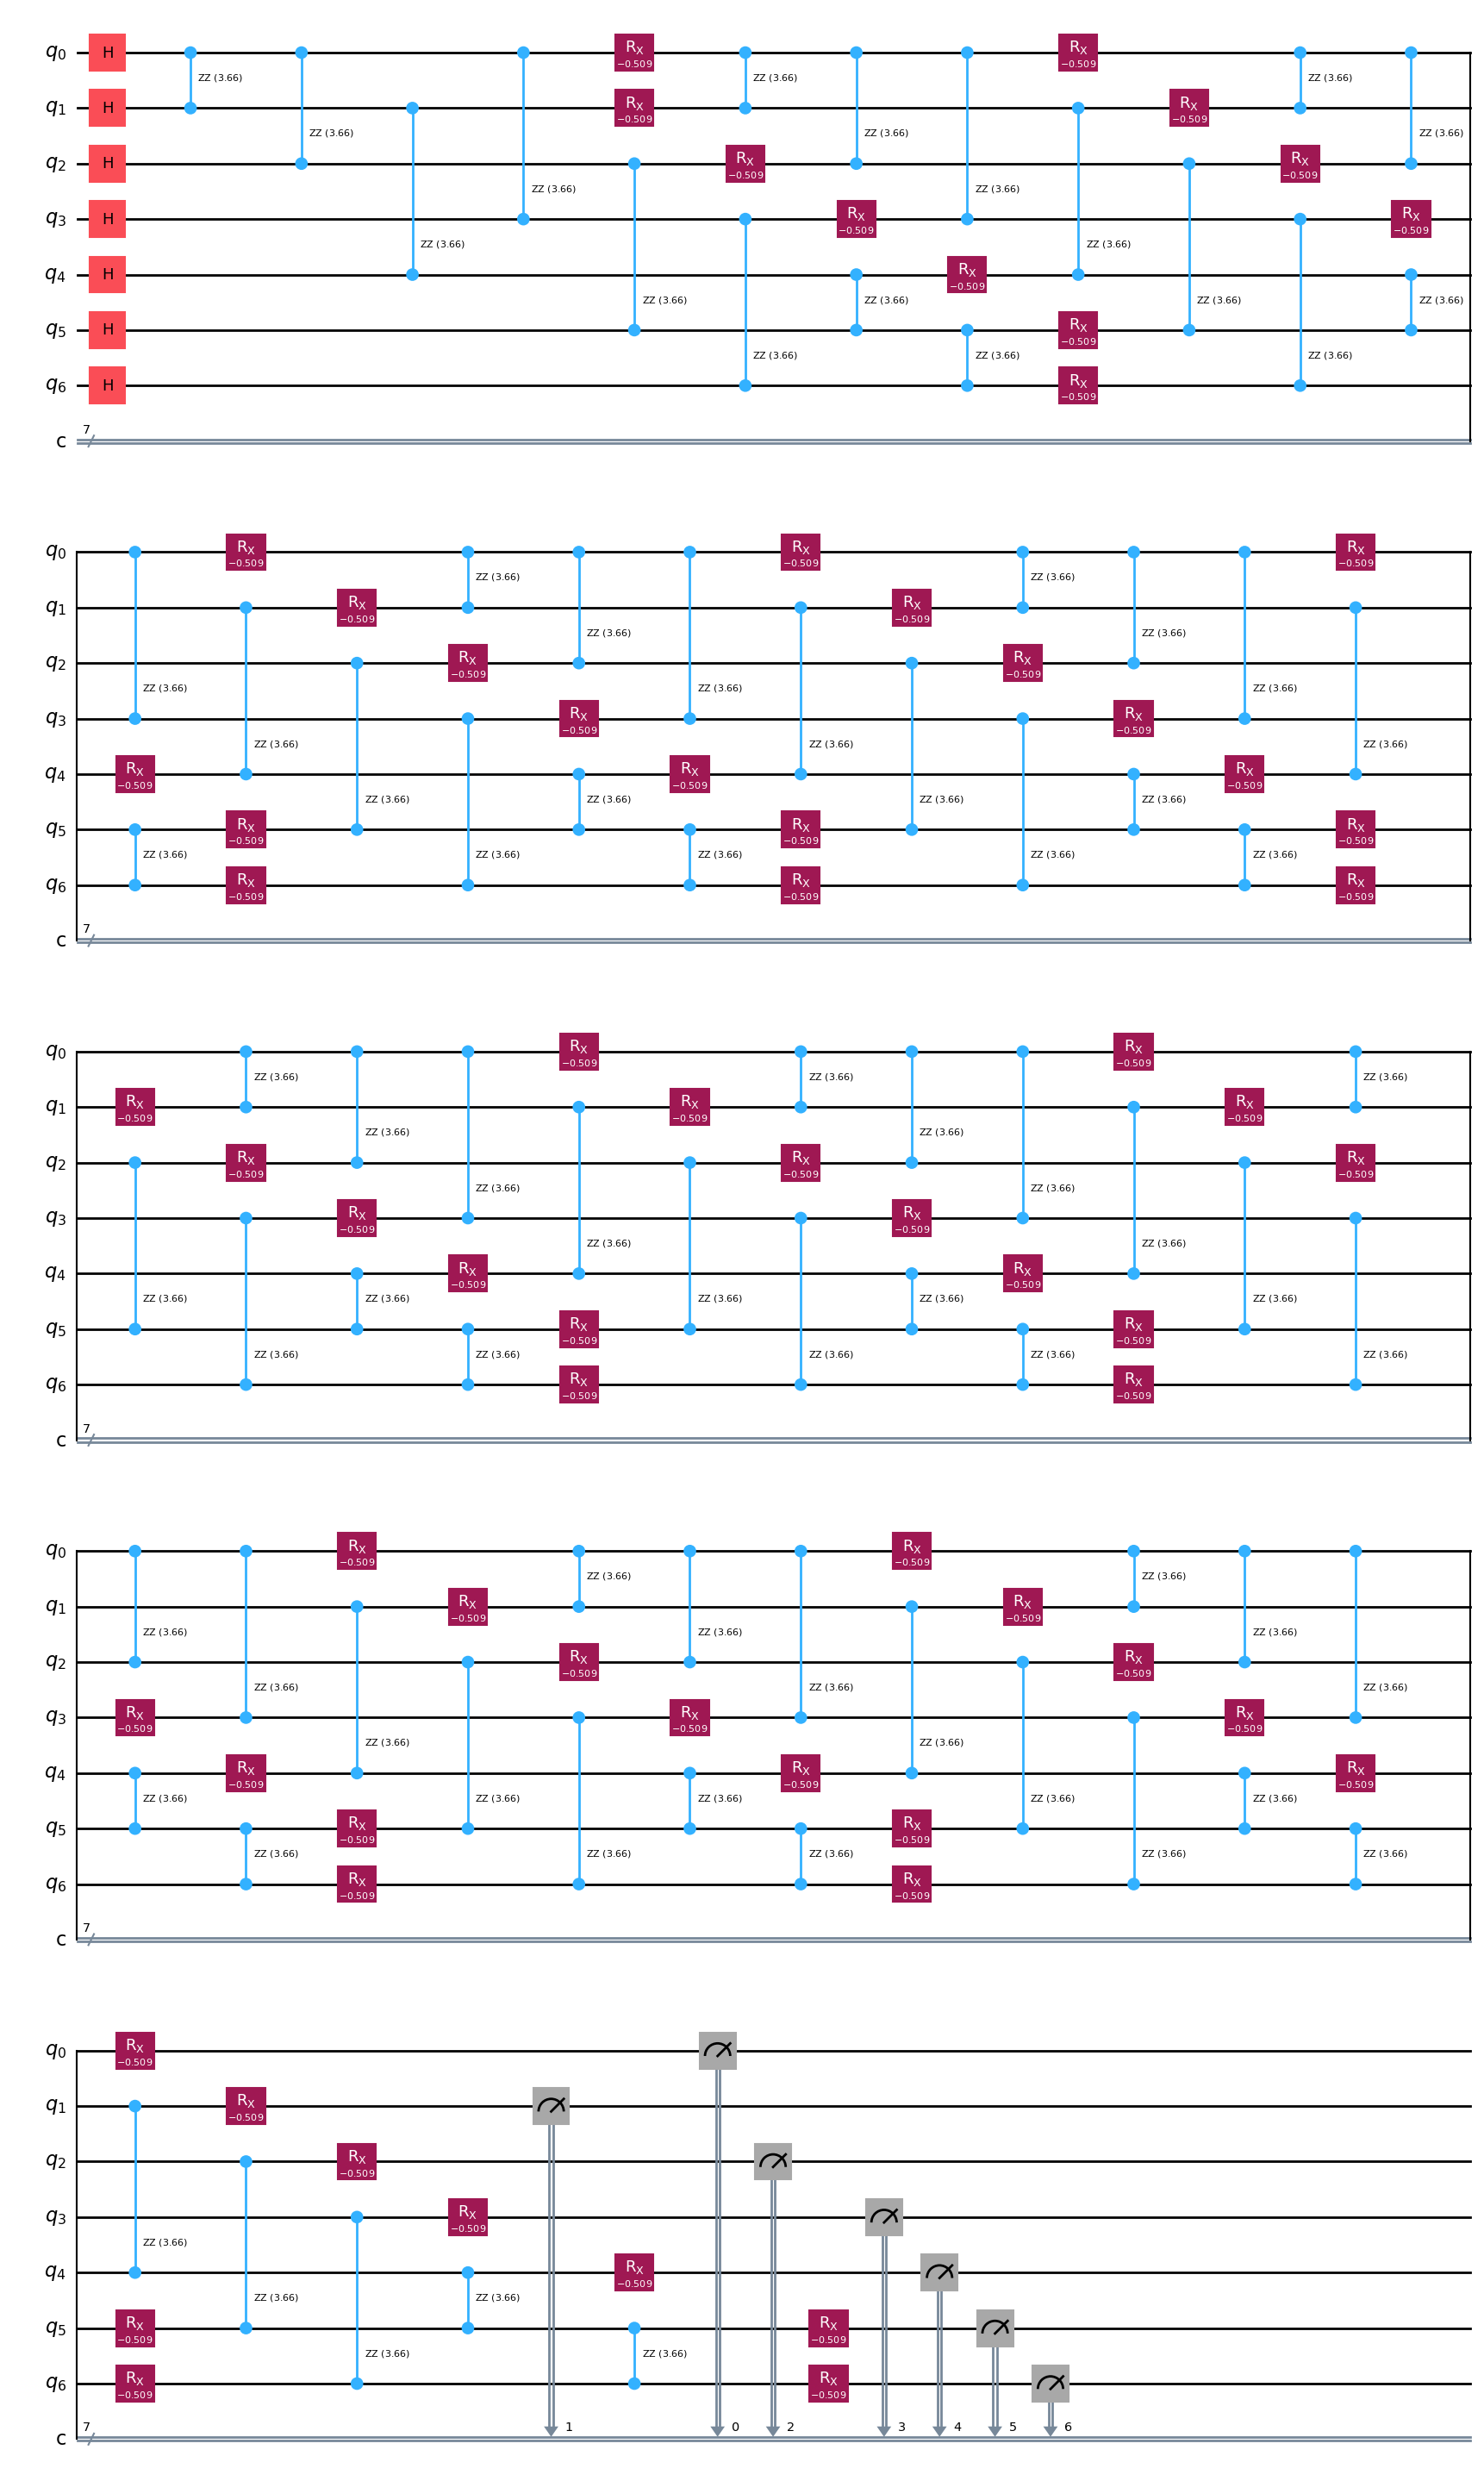

In [168]:
gamma, beta = result.x
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
qc = QuantumCircuit(q, c)
for i in range (n):
    qc.h(q[i])
for k in range(depth):
    for (i, j) in edges:
        qc.rzz(2*gamma, q[i], q[j])
    for i in range (n):
        qc.rx(2*beta, q[i])
for i in range (n):
    qc.measure(q[i], c[i])
qc.draw("mpl")

In [169]:
simulator = AerSimulator(shots=shots)
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()

Most probable cut is 7 edges
Second probable cut is 5 edges
Third probable cut is 7 edges
Most probable bitstring: 0101010


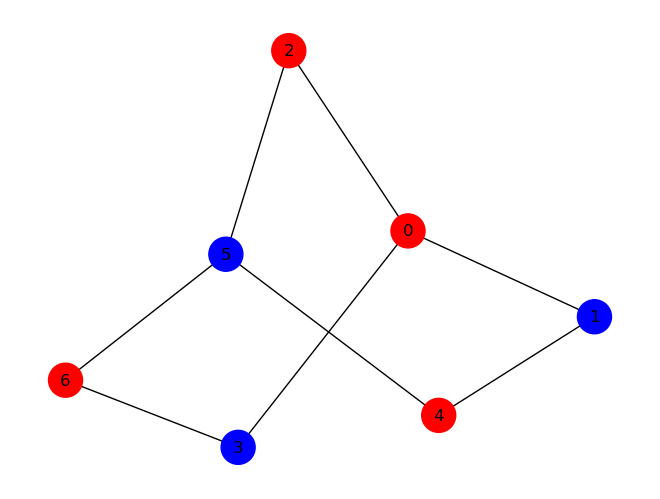

In [170]:
exval = 0
for j in (counts):
    count = counts[j]
    bitstring = j
    exval += exp_val(edges, bitstring, count)
exval = exval / 10000
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
print("Most probable cut is " + str(max_cut_value(edges, sorted_counts[0][0])) + " edges")
print("Second probable cut is " + str(max_cut_value(edges, sorted_counts[1][0])) + " edges")
print("Third probable cut is " + str(max_cut_value(edges, sorted_counts[2][0])) + " edges")
plot_histogram(counts)

graph = rx.PyGraph()
graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
graph.add_edges_from([(i, j, 1) for (i, j) in edges])
group1 = []
group2 = []
max = sorted_counts[0][0]
for i in range(len(max)):
    if max[i] == "0":
        group1.append(i)
    else:
        group2.append(i)

node_colors = ['red' if node in group1 else 'blue' for node in range(n)]

print("Most probable bitstring: " + max)

# vykreslení grafu
draw_graph(graph, node_size=600, with_labels=True, node_color=node_colors)